In [13]:
import pickle
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

In [14]:
# Path for packs
signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test02"

# Path for RandomForestClassifier
classifierPath = "/home/vaclav/Desktop/Diploma/Notebooks/Classifier/classificator.sav"

In [15]:
# Extracting the dataframes (data characteristics)
signalDataFrame = sigp.extract_data(signalPath)

/home/vaclav/Desktop/Diploma/Notebooks/Classifier/signalprocessing.py:338: RuntimeWarning: divide by zero encountered in log
  return (np.exp((1 / length) * np.sum(np.log(magnitudes)))) / ((1 / length) * np.sum(magnitudes))


In [16]:
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)
#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
signalDataFrame

,Total MaxAmp,SCO,Crest Factor,Centroid,Spread,Flatness
0,136878.163007,2214.200985,175.652512,2402.367925,4.769173e+06,0.003785
1,153366.072596,2201.611684,219.136686,3126.396820,6.189995e+06,0.003666
2,175622.764669,2222.151950,146.298655,4618.439445,3.830140e+06,0.003433
3,265752.557759,3488.602739,238.680041,4654.100700,6.693495e+06,0.002549
4,120201.005886,1690.228062,169.902548,2191.467220,3.235174e+06,0.003761
...,...,...,...,...,...,...
495,288320.020820,3320.122474,224.521156,3614.396183,5.966329e+06,0.002696
496,73596.986566,1385.274610,119.399179,2414.892478,1.665126e+06,0.003831
497,228600.202381,2889.285517,168.421239,4732.232034,4.874646e+06,0.002963
498,193593.909102,3060.940944,147.527002,5356.361690,4.384689e+06,0.002793


In [17]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [18]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame)
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)

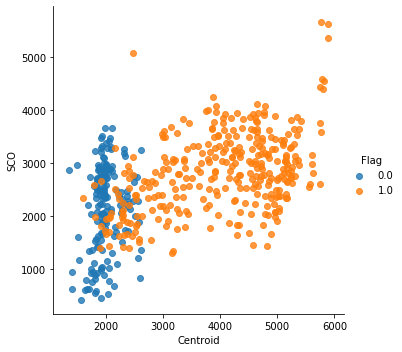

In [20]:
sn.lmplot('Centroid', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False)

In [9]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)

In [10]:
dd = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 0]
dd

,Total MaxAmp,SCO,Crest Factor,Centroid,Spread,Flatness,Flag
0,73716.556987,1167.624505,106.412993,2061.654017,3.507351e+06,0.004760,0.0
3,69746.464830,974.388527,111.094758,2457.918738,4.383329e+06,0.005311,0.0
5,134676.218652,1609.401113,167.878219,2634.327088,4.395091e+06,0.003903,0.0
6,54287.575031,863.363062,126.321921,2337.700877,4.359302e+06,0.005954,0.0
7,89490.076599,1118.278944,114.328329,2437.293777,3.715488e+06,0.004513,0.0
...,...,...,...,...,...,...,...
484,117847.182797,1296.783863,121.423421,2763.939673,4.140086e+06,0.004171,0.0
487,89037.781908,974.770793,144.064338,2755.307947,4.313227e+06,0.004864,0.0
488,94731.005110,1161.863696,107.187523,2527.753539,3.781401e+06,0.004444,0.0
493,67945.818599,884.289882,102.718631,2503.473248,4.291409e+06,0.005461,0.0


In [11]:
sigp.plot_all_spectrogramms(audiolist, dd, 256)

In [12]:
audiolist[176].make_audio()

In [ ]:
# Freeing the memory
del audiolist[:]
audiolist = None
del audiolist